Importação de Bibliotecas Utilizadas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import sys
import os

# adiciona a pasta 'scr' ao sys.path
sys.path.append(os.path.abspath("../src"))

from pre_processamento import preprocess_dataframe, clean_text

Carregamento e Inspeção Inicial dos Dados

In [2]:
columns = ['id','subject','sentiment','text']
df = pd.read_csv('../data/raw/twitter_training.csv', names = columns)
df.head()

,id,subject,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df = preprocess_dataframe(df, text_col="text", label_col='sentiment')
df.head()

,text,text_clean,sentiment
0,im getting on borderlands and i will murder yo...,im getting borderland murder,Positive
1,I am coming to the borders and I will kill you...,coming border kill,Positive
2,im getting on borderlands and i will kill you ...,im getting borderland kill,Positive
3,im coming on borderlands and i will murder you...,im coming borderland murder,Positive
4,im getting on borderlands 2 and i will murder ...,im getting borderland murder,Positive


Distribuição das Classes de Sentimento

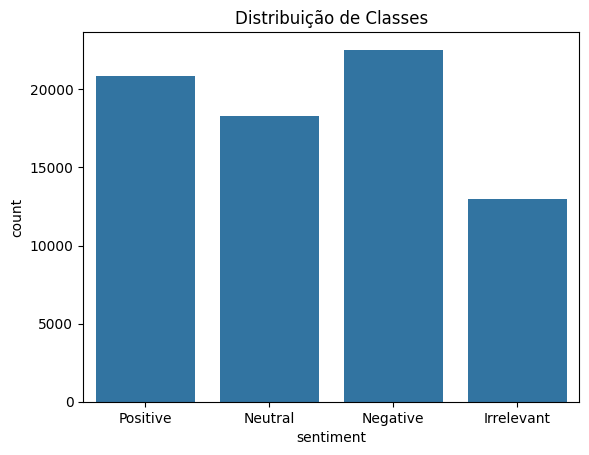

sentiment
Negative      0.301840
Positive      0.278943
Neutral       0.245280
Irrelevant    0.173937
Name: proportion, dtype: float64

In [11]:
sns.countplot(x="sentiment", data=df)
plt.title("Distribuição de Classes")
# Salvar imagem do gráfico
plt.savefig(r'../assets/distribuicao_classes_sentimentos.png')
plt.show()

df["sentiment"].value_counts(normalize=True)

Distribuição do Tamanho dos Tweets

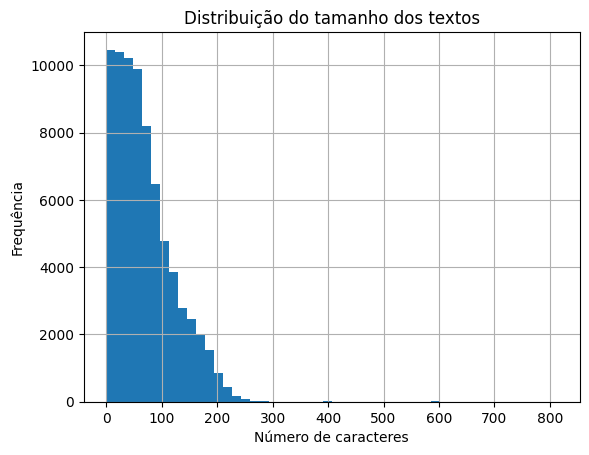

In [12]:
df["text_len"] = df["text_clean"].apply(len)
df["text_len"].hist(bins=50)
plt.title("Distribuição do tamanho dos textos")
plt.xlabel("Número de caracteres")
plt.ylabel("Frequência")
# Salvar imagem do gráfico
plt.savefig(r'../assets/distribuicao_tamanho_tweet.png')
plt.show()


Nuvem de Palavras para Visualização

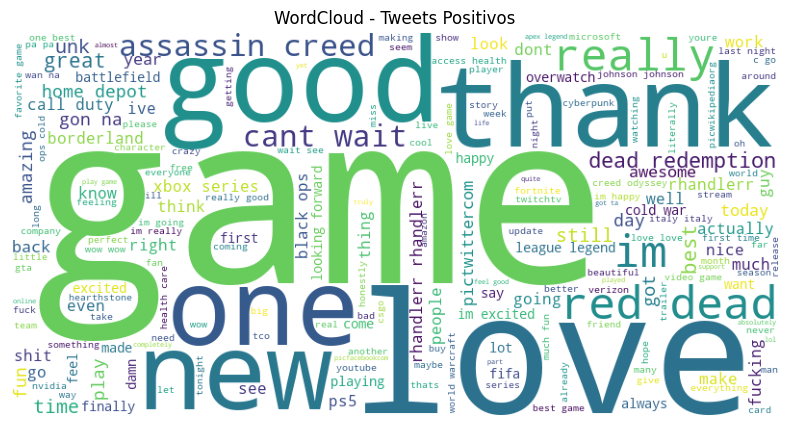

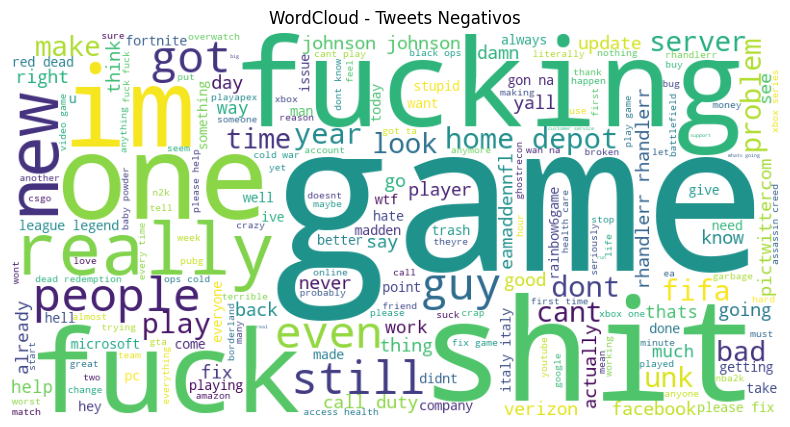

In [18]:
texto_positivo = " ".join(df[df.sentiment=="Positive"]["text_clean"])
texto_negativo = " ".join(df[df.sentiment=="Negative"]["text_clean"])

nuvem_palavras_positivas = WordCloud(width=800, height=400, background_color="white").generate(texto_positivo)
nuvem_palabras_negativas = WordCloud(width=800, height=400, background_color="white").generate(texto_negativo)

plt.figure(figsize=(10,5))
plt.imshow(nuvem_palavras_positivas)
plt.axis("off")
plt.title("WordCloud - Tweets Positivos")
# Salvar imagem do gráfico
plt.savefig(r'../assets/nuvem_palavras_positivas.png')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(nuvem_palabras_negativas)
plt.axis("off")
plt.title("WordCloud - Tweets Negativos")
# Salvar imagem do gráfico
plt.savefig(r'../assets/nuvem_palavras_negativas.png')
plt.show()


Palavras com Maior Frequência

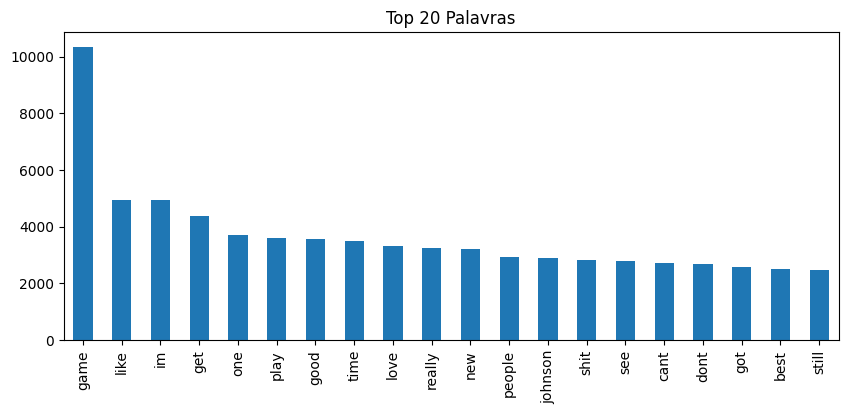

In [21]:

cv = CountVectorizer(max_features=20, ngram_range=(1,1))
X = cv.fit_transform(df["text_clean"])
freq = dict(zip(cv.get_feature_names_out(), X.toarray().sum(axis=0)))

pd.Series(freq).sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Top 20 Palavras")
# Salvar imagem do gráfico
plt.savefig(r'../assets/palavras_frequentes.png')
plt.show()
